Data from: https://data.worldbank.org/

In [8]:
import pandas as pd

In [9]:
all_data = pd.read_csv('World_Development_Indicators_48_Countries_Data.csv', index_col=0)
all_data

,Country Code,Series Name,Series Code,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,ARG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,238884218717.109,237659381124.75,223566966151.659,74851512162.7165,101636867120.234,121896063333.372,147089753394.708,...,457947074633.198,436577156654.803,504983468532.134,470668912836.887,550285828305.081,436649416740.588,371323128176.697,327255215138.132,..,..
Argentina,ARG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,6517.447867193,6410.96355648657,5964.88861957229,1975.75443689039,2655.2179232064,3152.31080205787,3764.72657452506,...,10851.0717236419,10231.5976670644,11707.8704117529,10797.5439169701,12493.7720428652,9813.55891432582,8262.87874420382,7211.95593299884,..,..
Argentina,ARG,Adjusted savings: net national savings (curren...,NY.ADJ.NNAT.CD,4734341903.76828,6797338893.90148,4903010362.26384,7404318402.86743,12573625071.7818,5120655493.793,7597284687.53471,...,14023103818.9679,15201828711.7639,10718085687.0785,10857578732.3062,12641597823.5629,-1163013545.51302,9458592998.04814,25683974992.347,..,..
Argentina,ARG,Changes in inventories (current US$),NE.GDI.STKB.CD,-428393400,3810712000,3887630900,-1081553429.62546,-1263806944.30302,2729177313.14914,3054822120.63319,...,5610053284.97238,6752296832.25673,8956685191.47406,18905168813.1378,19633037339.2289,7152431973.78891,190361849.35062,441055330.962704,1671019110.02028,96612134.4185528
Argentina,ARG,Consumer price index (2010 = 100),FP.CPI.TOTL,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Russia,RUS,Real interest rate (%),FR.INR.RINR,-18.9515529430941,-9.63311144094157,1.22657850679028,0.0329353849571815,-0.600170683349488,-7.32898586117018,-7.2066899103981,...,3.93707019289954,3.39714683539547,7.8945935741623,9.48435447314741,4.94560423051567,-1.02848259463135,5.3167092312001,5.82526212068193,-9.92468456653854,-3.75247538294546
Russia,RUS,"Services, value added (current US$)",NV.SRV.TOTL.CD,97737611697.8067,129121933878.422,157795680493.658,186014239588.517,231602029559.796,299398834429.018,372885980334.889,...,1286571006224.79,1146685188482.08,765492859635.078,727925582248.75,882067479901.52,885490962447.156,917210241179.304,841690817525.714,993752027076.491,1209296059885.67
Russia,RUS,Trade (% of GDP),NE.TRD.GNFS.ZS,69.393281498812,68.0939070373555,61.1108586644206,59.6454457319607,59.1282690062584,56.5818523974086,56.7132484897549,...,46.287149400499,47.8013412628116,49.3593493116887,46.5181198396096,46.8765243371311,51.5809003703964,49.2287536619033,45.9669082029127,50.5577441886249,43.7741144144238


In [10]:
for y in range(24):
    all_data.iloc[:,y+3] = pd.to_numeric(all_data.iloc[:,y+3], errors='coerce')
all_data.index.name = None
all_data.head(2)
all_data.shape

(1536, 27)

In [11]:
all_indicators = all_data['Series Name'].unique()

In [12]:
incomplete_indicators = []
for i in all_indicators:
    missing_data = all_data[all_data['Series Name'] == i].isna().sum(axis=1).sum()
    if missing_data > 200:
        print(i, missing_data)
        incomplete_indicators.append(i)

Deposit interest rate (%) 486
Gini index 473
Human capital index (HCI) (scale 0-1) 963
Lending interest rate (%) 451
Real interest rate (%) 451
Wholesale price index (2010 = 100) 892


In [13]:
for i in incomplete_indicators:
    all_data = all_data[all_data['Series Name'] != i]

all_data.shape

(1248, 27)

In [14]:
unique_indicators = all_data['Series Name'].unique()
unique_indicators

array(['Adjusted net national income (current US$)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted savings: net national savings (current US$)',
       'Changes in inventories (current US$)',
       'Consumer price index (2010 = 100)',
       'Current account balance (% of GDP)',
       'Current account balance (BoP, current US$)',
       'Exports of goods and services (current US$)',
       'Foreign direct investment, net (BoP, current US$)',
       'GDP (current US$)', 'GDP per capita (current US$)',
       'GNI (current US$)', 'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)',
       'Goods exports (BoP, current US$)',
       'Goods imports (BoP, current US$)', 'Gross savings (% of GDP)',
       'Inflation, consumer prices (annual %)', 'Labor force, total',
       'Manufacturing, value added (current US$)', 'Net migration',
       'Population, total', 'S

## Examining selected indicators

In [15]:
def get_data_for_indicator(all_data, indicator, countries_order = []):
    filtered_data = all_data[all_data['Series Name'] == indicator].iloc[:,3:].T
    filtered_data.index = pd.date_range(start='01-01-1999', end='01-01-2022', freq='YS')

    if len(countries_order) > 0:
        filtered_data = filtered_data[countries_order]
    return filtered_data

In [16]:
gdp_data = get_data_for_indicator(all_data, 'GDP (current US$)')
countries_sorted_by_gdp = gdp_data.iloc[-1].sort_values(
    ascending=False).index.values

gdp_data = get_data_for_indicator(all_data, 'GDP (current US$)', 
                                  countries_sorted_by_gdp)
gdp_data.head()

,United States,China,Japan,Germany,India,United Kingdom,France,Russia,Canada,Italy,...,Chile,Czechia,Finland,Portugal,New Zealand,Peru,Qatar,Greece,Kuwait,Hungary
1999-01-01,9631174489000.0,1094010482677.390015,4635982020564.969727,2194945278872.590088,458820417337.807007,1689407711357.040039,1493151737698.459961,195907128350.93399,678409995711.892944,1252446659833.790039,...,75596598517.358597,65173036730.620399,135264083658.688004,127470385557.184006,58762260625.875801,50187324567.883003,12393131868.131901,142588875293.748993,30122398833.170502,49073373275.937897
2000-01-01,10250947997000.0,1211331627479.0,4968359152795.660156,1947981991011.77002,468394937262.369995,1666048767079.76001,1365639660792.159912,259710142196.942993,744773415931.587036,1146676894209.72998,...,78249883995.625504,61823494487.036301,126019543413.334,118605192877.388,52622954598.929901,51744749133.212997,17759890109.890099,130457756628.436005,37718794714.181099,47218411470.253799
2001-01-01,10581929774000.0,1339400843164.879883,4374709984220.009766,1945790973803.149902,485441014538.638,1648765214387.0,1377657339291.340088,306602070620.5,738962729044.525024,1168023426056.379883,...,71517267767.735992,67808695573.681,129533107311.811005,121604107164.996994,53872463497.170303,52030158775.405502,17538461538.461498,136309295225.339996,34889597791.4123,53749989092.019699
2002-01-01,10929112955000.0,1470557565965.51001,4182845406488.620117,2078484517474.51001,514937948870.080017,1785781372553.919922,1501409382971.379883,345470494417.862976,760649334098.005005,1276769338449.300049,...,70295232513.051498,82196206089.758499,140404460203.138,134795565549.419006,66627729311.449501,54777553515.080902,19363736263.736301,154564203586.95401,38135756834.174103,67608919144.368401
2003-01-01,11456442041000.0,1660280610709.709961,4519563042183.730469,2501640388482.350098,607699285433.871948,2056704586736.550049,1844544792036.860107,430347420194.659973,895540646634.786987,1577621707050.51001,...,76507853875.664902,100090467581.268005,171652458349.411011,165226175536.792999,88250885550.262604,58731030121.867104,23533791208.791199,202370140236.265015,47874659167.993896,85285075491.886002


<Axes: >

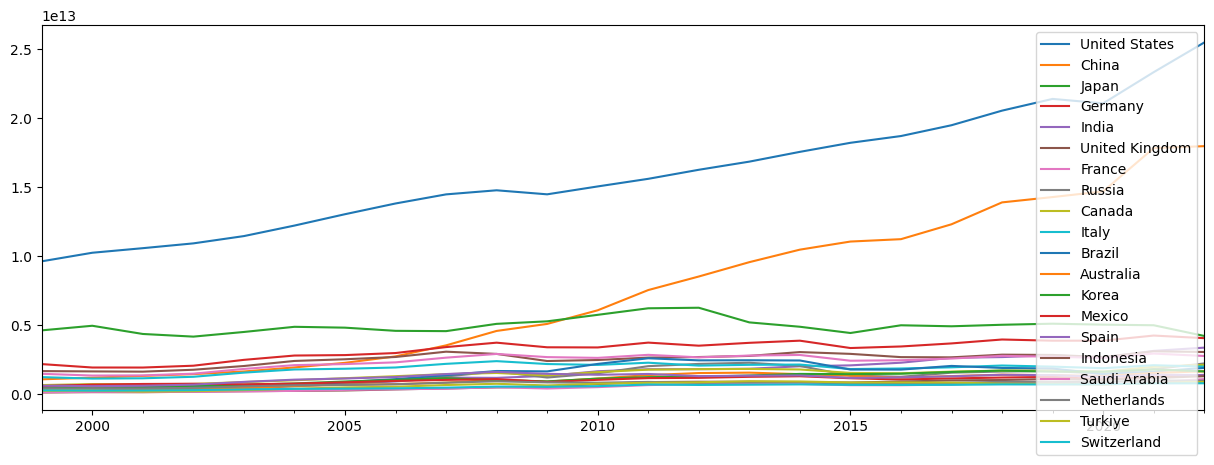

In [17]:
gdp_data.iloc[:,:20].plot(figsize=(15,5))

<Axes: >

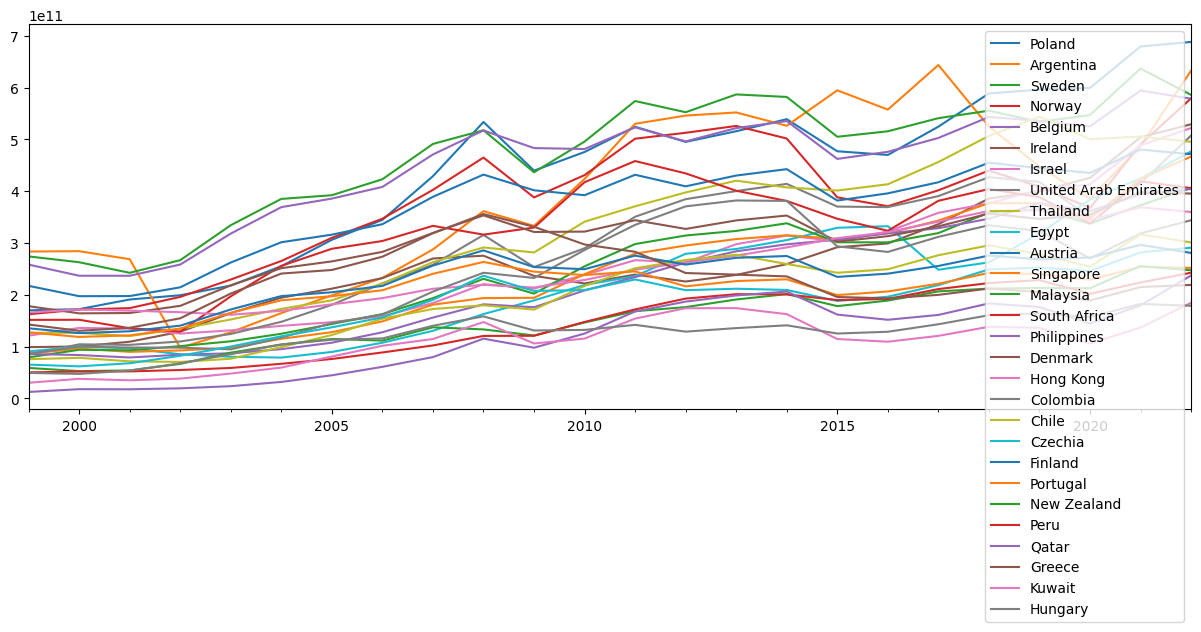

In [18]:
gdp_data.iloc[:,20:].plot(figsize=(15,5))

In [19]:
countries_sorted_by_gdp_in_1999 = gdp_data.iloc[0].sort_values(ascending=False).index.values
countries_sorted_by_gdp_in_1999

array(['United States', 'Japan', 'Germany', 'United Kingdom', 'France',
       'Italy', 'China', 'Canada', 'Spain', 'Mexico', 'Brazil', 'Korea',
       'India', 'Netherlands', 'Australia', 'Switzerland', 'Argentina',
       'Sweden', 'Belgium', 'Turkiye', 'Austria', 'Russia', 'Denmark',
       'Poland', 'Hong Kong', 'Norway', 'Saudi Arabia', 'South Africa',
       'Greece', 'Indonesia', 'Finland', 'Portugal', 'Thailand', 'Israel',
       'Ireland', 'Egypt', 'Singapore', 'Colombia', 'Philippines',
       'United Arab Emirates', 'Malaysia', 'Chile', 'Czechia',
       'New Zealand', 'Peru', 'Hungary', 'Kuwait', 'Qatar'], dtype=object)

In [20]:
countries_sorted_by_gdp = gdp_data.iloc[-1].sort_values(ascending=False).index.values
countries_sorted_by_gdp

array(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Russia', 'Canada', 'Italy', 'Brazil',
       'Australia', 'Korea', 'Mexico', 'Spain', 'Indonesia',
       'Saudi Arabia', 'Netherlands', 'Turkiye', 'Switzerland', 'Poland',
       'Argentina', 'Sweden', 'Norway', 'Belgium', 'Ireland', 'Israel',
       'United Arab Emirates', 'Thailand', 'Egypt', 'Austria',
       'Singapore', 'Malaysia', 'South Africa', 'Philippines', 'Denmark',
       'Hong Kong', 'Colombia', 'Chile', 'Czechia', 'Finland', 'Portugal',
       'New Zealand', 'Peru', 'Qatar', 'Greece', 'Kuwait', 'Hungary'],
      dtype=object)

In [21]:
gdp_change = gdp_data.pct_change()
gdp_change.corr()

,United States,China,Japan,Germany,India,United Kingdom,France,Russia,Canada,Italy,...,Chile,Czechia,Finland,Portugal,New Zealand,Peru,Qatar,Greece,Kuwait,Hungary
United States,1.000000,0.171485,-0.171850,0.191632,0.352743,0.622474,0.259001,0.562704,0.678212,0.288088,...,0.499105,0.335279,0.211358,0.305109,0.254786,0.431082,0.597833,0.340794,0.710759,0.344600
China,0.171485,1.000000,0.336360,0.522679,0.449922,0.451773,0.561522,0.602043,0.571022,0.524421,...,0.649932,0.559799,0.557740,0.442227,0.381326,0.764215,0.668613,0.395880,0.510218,0.413812
Japan,-0.171850,0.336360,1.000000,0.259622,0.206068,0.014736,0.281669,0.249646,0.309674,0.274729,...,0.373012,0.209379,0.281459,0.196842,0.224286,0.331020,0.281424,0.137405,0.225061,0.131383
Germany,0.191632,0.522679,0.259622,1.000000,0.431106,0.706798,0.978849,0.526812,0.592813,0.967080,...,0.453627,0.850265,0.979322,0.937961,0.779984,0.431137,0.387022,0.841265,0.468443,0.860895
India,0.352743,0.449922,0.206068,0.431106,1.000000,0.498185,0.455214,0.419277,0.606675,0.473457,...,0.649511,0.377404,0.409565,0.470193,0.622068,0.566656,0.361069,0.438219,0.296581,0.381710
United Kingdom,0.622474,0.451773,0.014736,0.706798,0.498185,1.000000,0.735773,0.570800,0.707845,0.727490,...,0.575561,0.627307,0.714943,0.684396,0.744298,0.429370,0.494826,0.646890,0.551495,0.746148
France,0.259001,0.561522,0.281669,0.978849,0.455214,0.735773,1.000000,0.583868,0.647715,0.993891,...,0.497637,0.891394,0.981450,0.966937,0.782710,0.458796,0.455078,0.905941,0.527327,0.901582
Russia,0.562704,0.602043,0.249646,0.526812,0.419277,0.570800,0.583868,1.000000,0.880599,0.592258,...,0.671420,0.677127,0.616872,0.555932,0.473369,0.773279,0.894832,0.537379,0.884648,0.599891
Canada,0.678212,0.571022,0.309674,0.592813,0.606675,0.707845,0.647715,0.880599,1.000000,0.650749,...,0.817290,0.631517,0.629260,0.609794,0.647982,0.759906,0.815224,0.575730,0.851164,0.594688
Italy,0.288088,0.524421,0.274729,0.967080,0.473457,0.727490,0.993891,0.592258,0.650749,1.000000,...,0.479912,0.902515,0.973000,0.979087,0.779716,0.444322,0.459099,0.927724,0.535800,0.917805


### Inflation

In [22]:
inflation_data = get_data_for_indicator(
    all_data, 'Inflation, consumer prices (annual %)', 
    countries_sorted_by_gdp)
inflation_data.tail()

,United States,China,Japan,Germany,India,United Kingdom,France,Russia,Canada,Italy,...,Chile,Czechia,Finland,Portugal,New Zealand,Peru,Qatar,Greece,Kuwait,Hungary
2018-01-01,2.442583,2.07479,0.989095,1.732169,3.938826,2.29284,1.850815,2.878297,2.268226,1.137488,...,2.43489,2.149495,1.083821,0.993716,1.598297,1.509154,0.255815,0.625621,0.543133,2.850248
2019-01-01,1.81221,2.899234,0.468776,1.44566,3.729506,1.738105,1.108255,4.470367,1.949269,0.611247,...,2.557545,2.847876,1.024094,0.338178,1.619632,2.252122,-0.666641,0.253008,1.091848,3.338586
2020-01-01,1.233584,2.419422,-0.024996,0.144878,6.623437,0.989487,0.476499,3.381659,0.717,-0.137708,...,3.045491,3.161295,0.290555,-0.012438,1.714562,2.002412,-2.540315,-1.247984,2.10173,3.326744
2021-01-01,4.697859,0.981015,-0.233353,3.066667,5.131407,2.518371,1.642331,6.694459,3.395193,1.873783,...,4.524568,3.839845,2.194574,1.265657,3.941121,4.271664,2.304466,1.223825,3.423629,5.110965
2022-01-01,8.0028,1.973576,2.497703,6.872574,6.699034,7.922049,5.222367,NaN,6.802801,8.20129,...,11.643867,15.100165,7.123508,7.832691,7.172225,8.333706,4.995276,9.64526,NaN,14.608144


In [23]:
inflation_data.isna().sum()

United States            0
China                    0
Japan                    0
Germany                  0
India                    0
United Kingdom           0
France                   0
Russia                   1
Canada                   0
Italy                    0
Brazil                   0
Australia                0
Korea                    0
Mexico                   0
Spain                    0
Indonesia                0
Saudi Arabia             0
Netherlands              0
Turkiye                  0
Switzerland              0
Poland                   0
Argentina               24
Sweden                   0
Norway                   0
Belgium                  0
Ireland                  0
Israel                   0
United Arab Emirates     9
Thailand                 0
Egypt                    0
Austria                  0
Singapore                0
Malaysia                 0
South Africa             0
Philippines              0
Denmark                  0
Hong Kong                0
C

<Axes: >

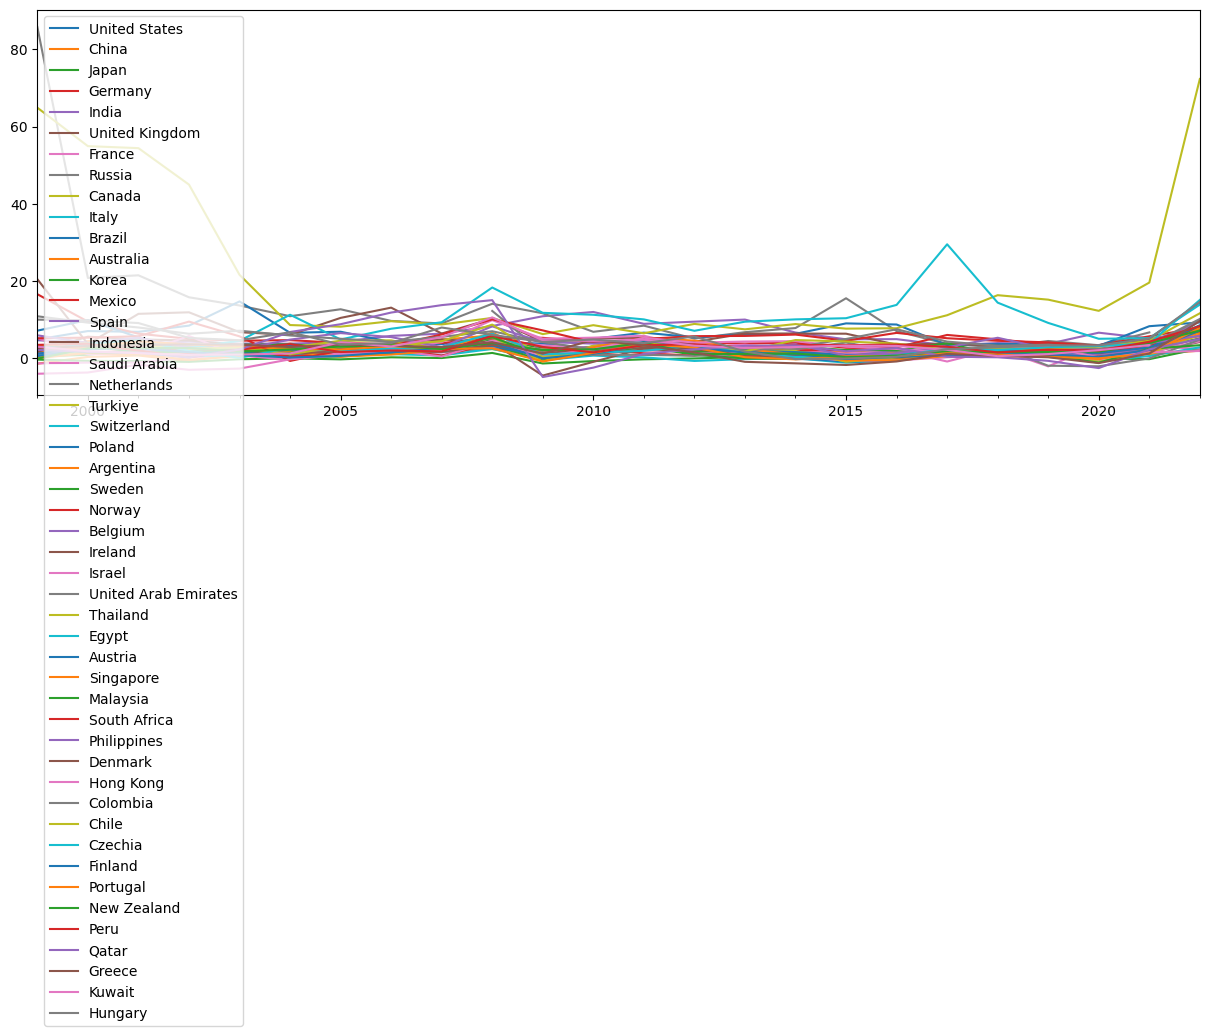

In [24]:
inflation_data.plot(figsize=(15, 5))

### Unemployment

In [25]:

unemployment_data = get_data_for_indicator(
    all_data, 'Unemployment, total (% of total labor force) (national estimate)', 
    countries_sorted_by_gdp)
unemployment_data.tail()


,United States,China,Japan,Germany,India,United Kingdom,France,Russia,Canada,Italy,...,Chile,Czechia,Finland,Portugal,New Zealand,Peru,Qatar,Greece,Kuwait,Hungary
2018-01-01,3.9,4.93,2.47,3.38,7.65,4.0,9.02,4.85,5.83,10.61,...,7.21,2.25,7.36,6.99,4.34,3.49,0.11,19.18,NaN,3.71
2019-01-01,3.67,5.15,2.35,3.14,6.51,3.74,8.41,4.5,5.66,9.95,...,7.27,2.02,6.69,6.46,4.11,3.38,0.1,17.04,NaN,3.42
2020-01-01,8.05,5.61,2.81,3.86,7.86,NaN,8.01,5.59,9.46,9.16,...,10.94,2.55,7.76,6.8,4.6,7.18,0.14,15.9,NaN,4.25
2021-01-01,5.35,5.11,2.83,3.57,6.38,NaN,7.86,4.72,7.46,9.5,...,9.28,2.8,7.61,6.58,3.78,5.1,0.14,14.66,NaN,4.05
2022-01-01,3.65,NaN,2.6,NaN,4.82,NaN,NaN,NaN,5.26,NaN,...,8.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
unemployment_data.isna().sum()

United States            0
China                    3
Japan                    0
Germany                  1
India                   15
United Kingdom           3
France                   1
Russia                   1
Canada                   0
Italy                    1
Brazil                   2
Australia                0
Korea                    0
Mexico                   0
Spain                    1
Indonesia                0
Saudi Arabia             2
Netherlands              1
Turkiye                  1
Switzerland              1
Poland                   1
Argentina                3
Sweden                   1
Norway                   1
Belgium                  1
Ireland                  1
Israel                   1
United Arab Emirates    16
Thailand                 2
Egypt                    1
Austria                  1
Singapore                2
Malaysia                 3
South Africa             0
Philippines              2
Denmark                  1
Hong Kong                1
C

<Axes: >

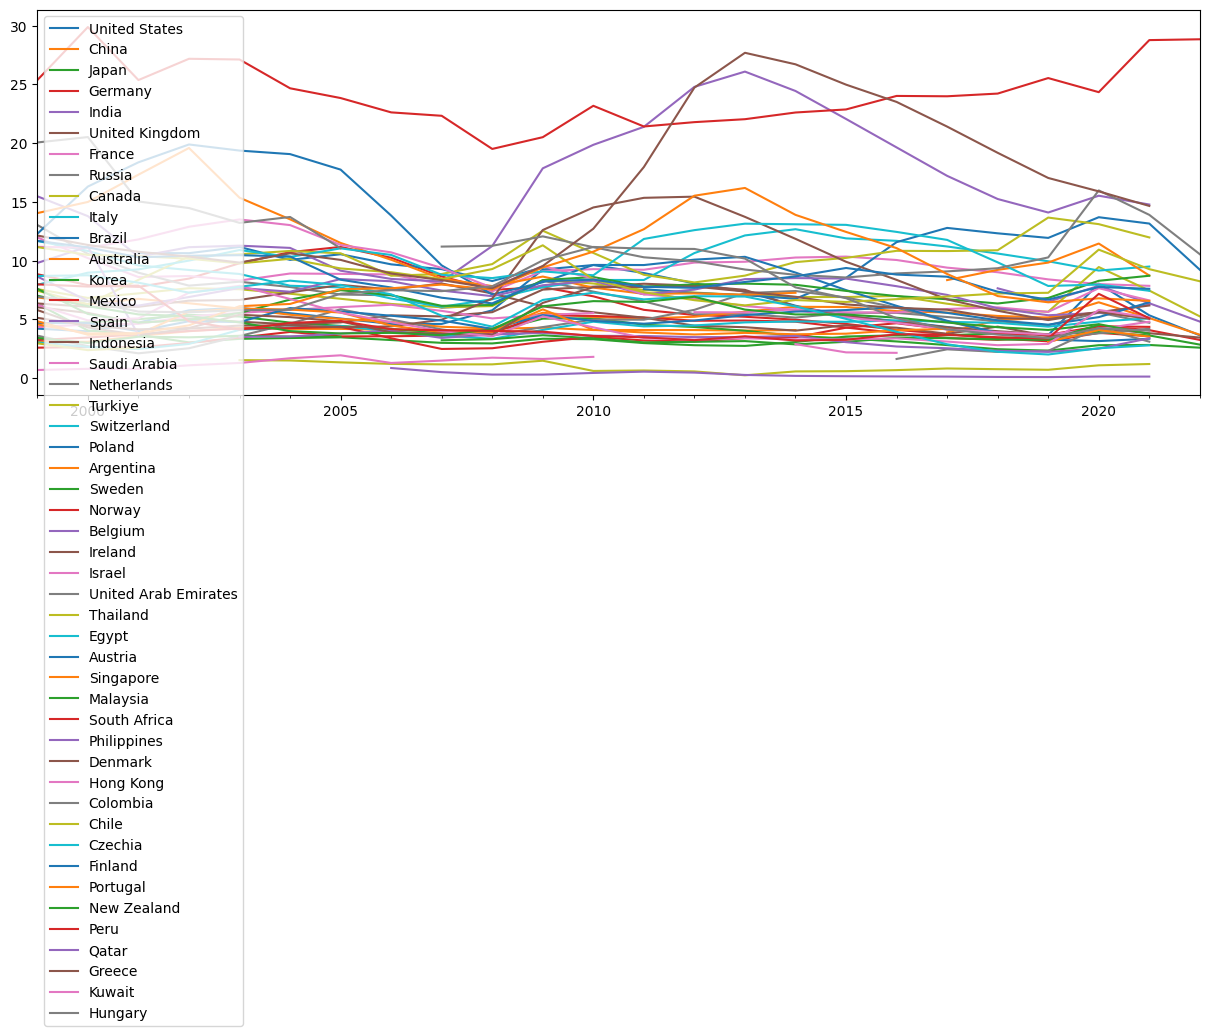

In [27]:
unemployment_data.plot(figsize=(15,5))

# Data coverage

In [28]:
msci_world_countries = [
    'United States',
    'Japan',
    'United Kingdom',
    'Canada',
    'France',
    'Switzerland',
    'Germany',
    'Australia',
    'Netherlands',
    'Denmark',
    'Sweden',
    'Spain',
    'Hong Kong',
    'Italy',
    'Singapore',
    'Finland',
    'Belgium',
    'Norway',
    'Israel',
    'Ireland',
    'New Zealand',
    'Austria',
    'Portugal'
]
msci_emerging_plus_countries = [
    'China',
    'Taiwan',
    'India',
    'Korea',
    'Brazil',
    'Saudi Arabia',
    'South Africa',
    'Mexico',
    'Thailand',
    'Indonesia',
    'Malaysia',
    'United Arab Emirates',
    'Qatar',
    'Kuwait',
    'Turkiye',
    'Philippines',
    'Poland',
    'Chile',
    'Greece',
    'Hungary',
    'Czechia',
    'Egypt',
    'Colombia',
    'Argentina',  # In G20 but not in ACWI
    'Russia'  # In G20 but not in ACWI
]
msci_acwi_plus_countries = msci_world_countries + msci_emerging_plus_countries

In [29]:
all_data_points_per_country = len(unique_indicators)*23
all_data_points_per_country

598

In [30]:
for c in msci_world_countries:
    if c in all_data.index:
        missing_data = all_data.loc[c,:].isna().sum(axis=1).sum()
        print(c, missing_data)
    else:
        print(c, 'No data')

United States 13
Japan 13
United Kingdom 14
Canada 13
France 8
Switzerland 8
Germany 8
Australia 7
Netherlands 8
Denmark 8
Sweden 8
Spain 8
Hong Kong 56
Italy 8
Singapore 9
Finland 8
Belgium 29
Norway 8
Israel 10
Ireland 50
New Zealand 23
Austria 56
Portugal 14


In [31]:
for c in msci_emerging_plus_countries:
    if c in all_data.index:
        missing_data = all_data.loc[c,:].isna().sum(axis=1).sum()
        print(c, missing_data)
    else:
        print(c, 'No data')

China 17
Taiwan No data
India 22
Korea 7
Brazil 9
Saudi Arabia 9
South Africa 7
Mexico 7
Thailand 9
Indonesia 7
Malaysia 10
United Arab Emirates 226
Qatar 136
Kuwait 66
Turkiye 8
Philippines 11
Poland 8
Chile 7
Greece 64
Hungary 8
Czechia 8
Egypt 12
Colombia 9
Argentina 58
Russia 14
